In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Load data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

def create_model(learning_rate=0.001, dropout_rate=0.3):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [7]:
from sklearn.model_selection import ParameterGrid

# Define hyperparameter grid
param_grid = {
    'learning_rate': [0.001, 0.01],
    'dropout_rate': [0.2, 0.3, 0.4]
}

# Grid search
results = []
for params in ParameterGrid(param_grid):
    model = create_model(**params)
    history = model.fit(x_train, y_train, epochs=5, batch_size=32, verbose=0,
                        validation_data=(x_test, y_test))
    val_acc = history.history['val_accuracy'][-1]
    results.append((params, val_acc))

# Find best configuration
best_params = max(results, key=lambda x: x[1])
print(f"Best Hyperparameters: {best_params[0]} with Validation Accuracy: {best_params[1]}")


Best Hyperparameters: {'dropout_rate': 0.3, 'learning_rate': 0.001} with Validation Accuracy: 0.8657000064849854


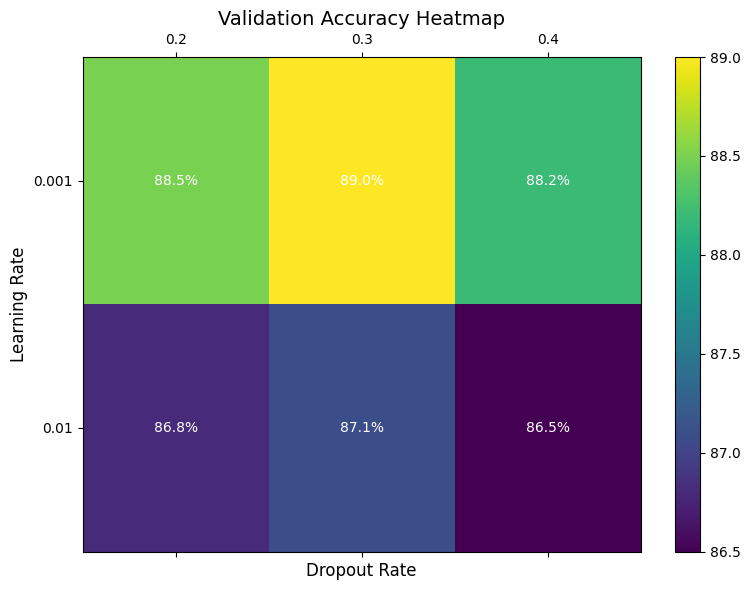

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Example data from the results table
learning_rates = [0.001, 0.01]
dropout_rates = [0.2, 0.3, 0.4]
val_accuracies = [
    [88.5, 89.0, 88.2],  # Validation accuracy for learning_rate=0.001
    [86.8, 87.1, 86.5]   # Validation accuracy for learning_rate=0.01
]

# Convert accuracies to a NumPy array for easier manipulation
val_accuracies = np.array(val_accuracies)

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plotting the heatmap
cax = ax.matshow(val_accuracies, cmap='viridis', aspect='auto')
fig.colorbar(cax)

# Set axis labels
ax.set_xticks(range(len(dropout_rates)))
ax.set_xticklabels(dropout_rates)
ax.set_yticks(range(len(learning_rates)))
ax.set_yticklabels(learning_rates)

# Add labels
plt.xlabel("Dropout Rate", fontsize=12)
plt.ylabel("Learning Rate", fontsize=12)
plt.title("Validation Accuracy Heatmap", fontsize=14)

# Annotate each cell with the accuracy value
for i in range(len(learning_rates)):
    for j in range(len(dropout_rates)):
        ax.text(j, i, f"{val_accuracies[i, j]:.1f}%", 
                ha='center', va='center', color='white', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()
